In [1]:
from __future__ import print_function
import PIL
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 16})

from mpl_toolkits import mplot3d
from matplotlib.pyplot import text
from IPython.display import display, Math, Latex, Markdown
import os
from tqdm.notebook import tqdm
#%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstatsπ
from tqdm.notebook import tqdm
import random

from scipy import stats, interpolate
from astropy.visualization import hist

from sklearn import datasets
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Handwritten digits

## Play with data
Import, show and plot with targets

In [2]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


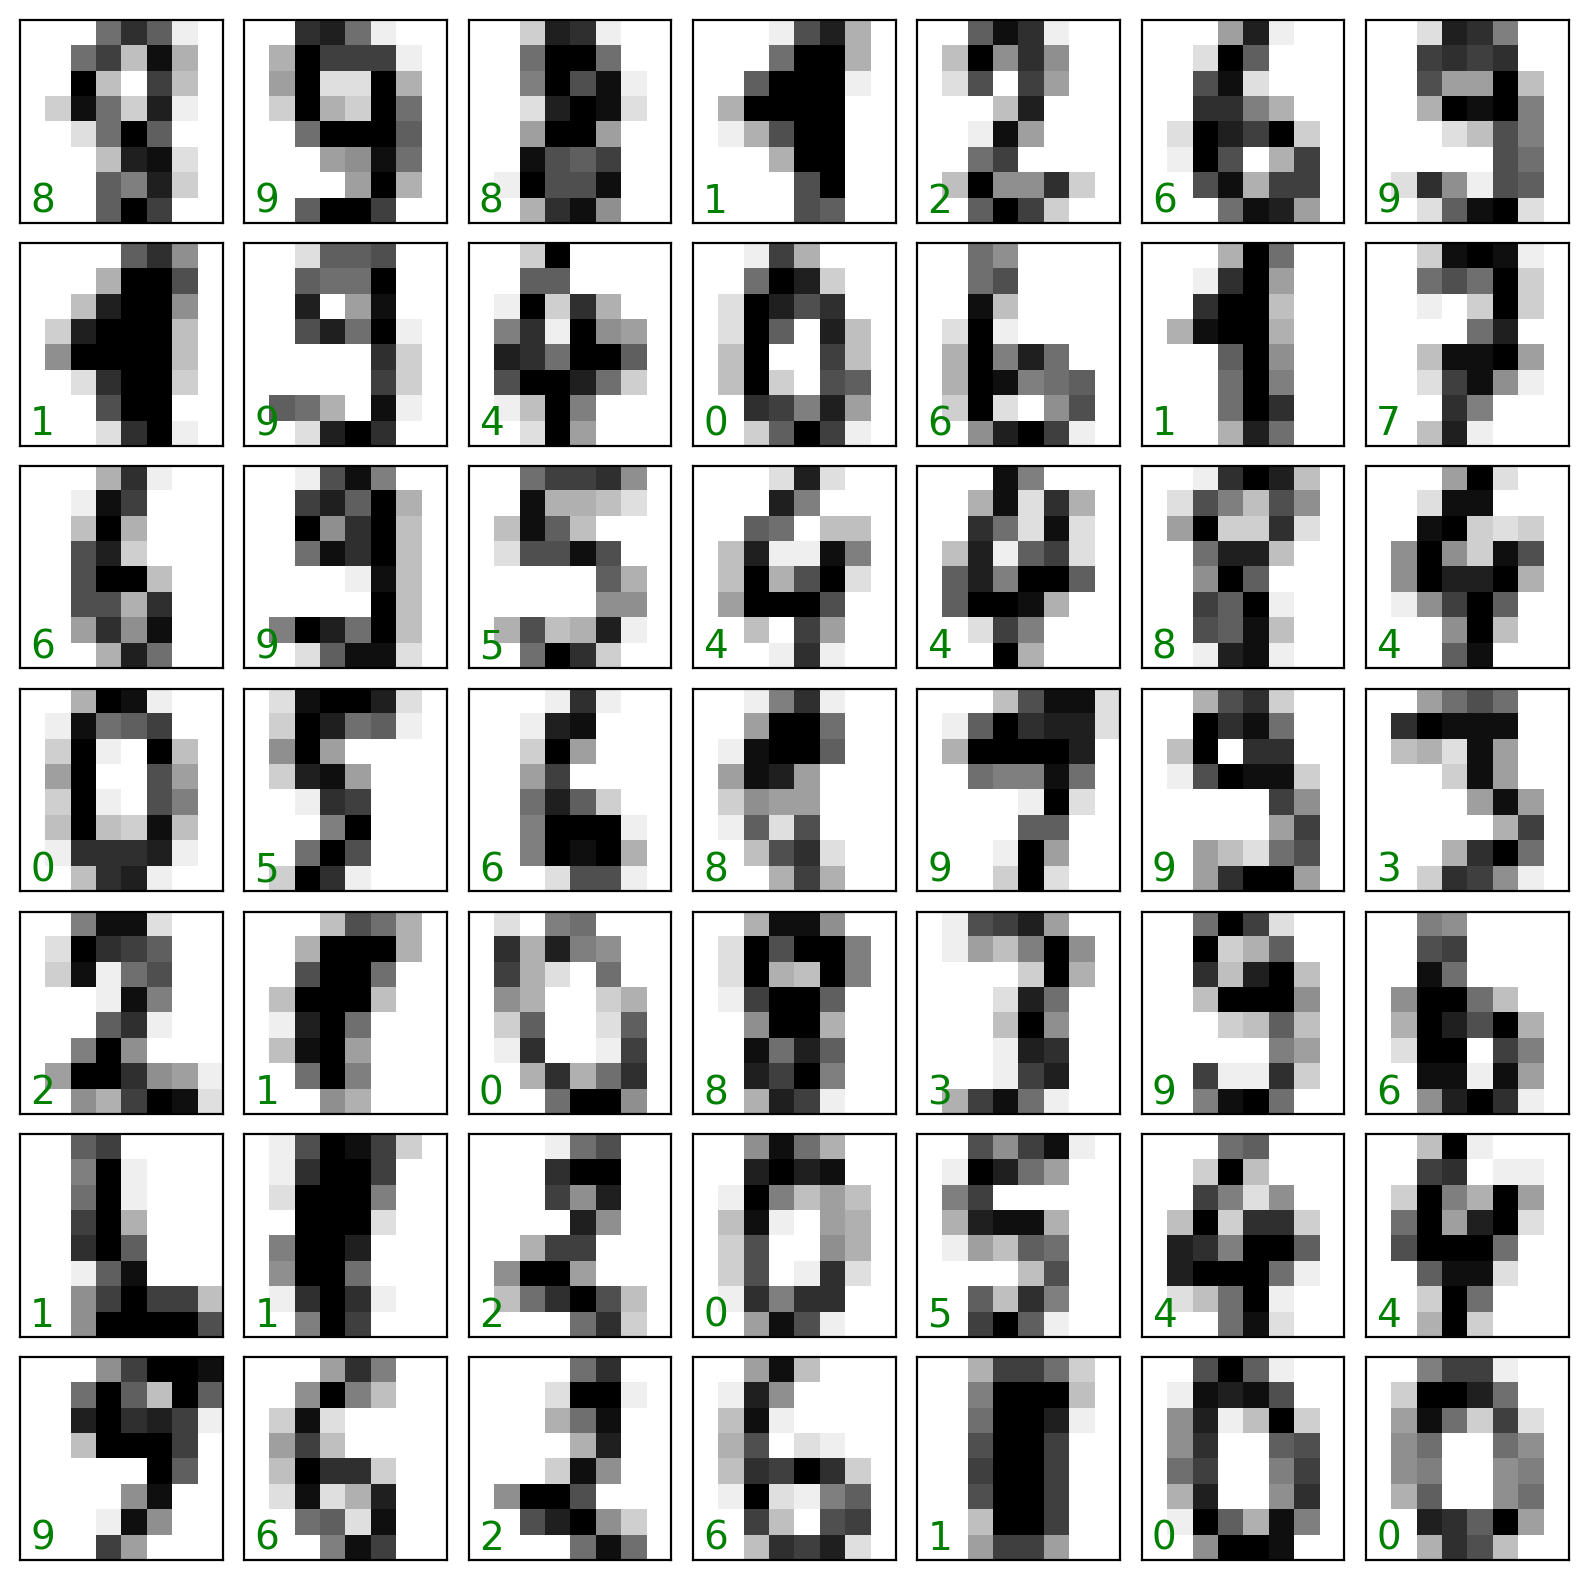

In [3]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(4321)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
    

In [4]:
print(digits.data.shape)

# The images themselves
print(digits.images[0])

# The data for use in our algorithms
print(digits.data[0])

# The labels
print(digits.target)
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]
0


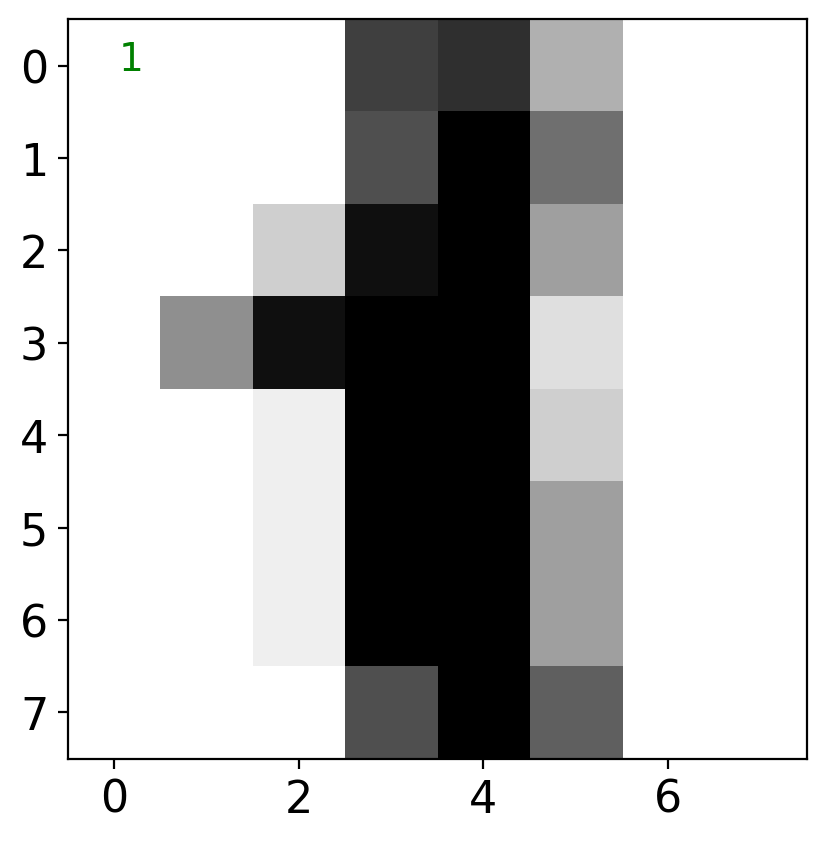

In [5]:
#let's plot just one square

plt.imshow((digits.images[1]), cmap='binary')
plt.text(0.05, 0.05, str(digits.target[1]), color='green', fontsize=14)
plt.show()

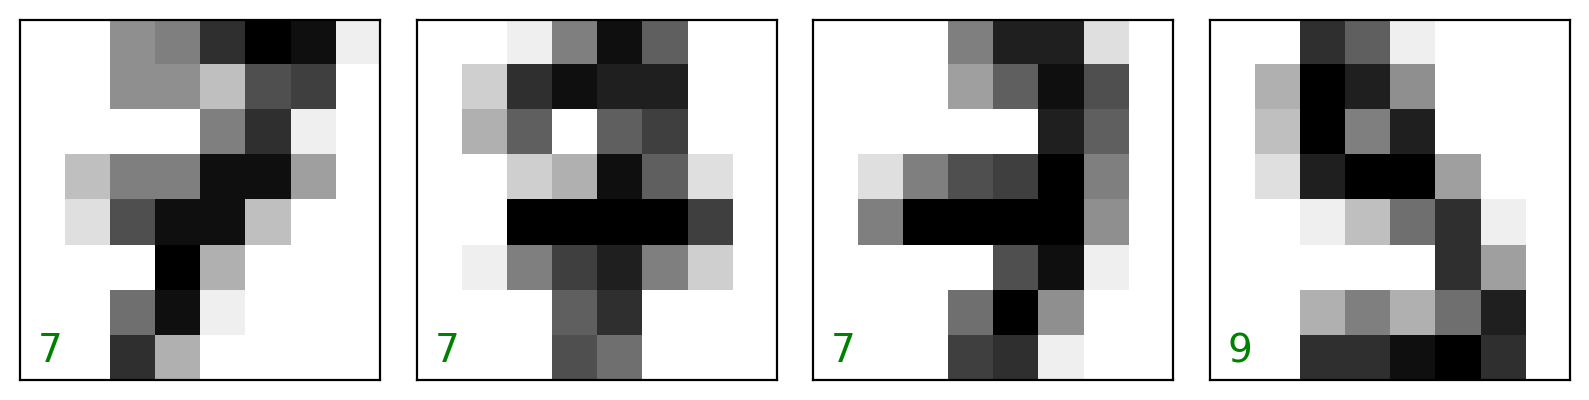

In [6]:
fig, axes = plt.subplots(1,4, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[7+10*i]), cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[7+10*i]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

## Dimensionality reduction

It's difficult to visualize our data in a 64-dim parameters space: let's reduce them!\
I want to try with a dimensionality reduction to 3 features and then plot them in a 2D color map in which the two axis are 2 components and the 3rd comp is reperesented in the color.

It is possible to see some "blobs" of colors, which may correspond to some digits? ... who knows

------

I plotted it also in a 3D (interactive if `%matplotlib notebook` command is on) map but this time on the tree axis are represented the three reduced components, while the true digits are represented with the color: it seems that some blobs really do are bouches of digits! Some of them are more distanciated and some other clearly not:

&#10148; 0 and 4 blobs are very well apart from the other\
&#10148; 2 and 7 are also "vertically" separated\
&#10148; 1 are above the other (but a little mixed with 6)\
&#10148; 8,8,3,5 are very mixed

In [7]:
X = digits.data
embedding = Isomap(n_components=3)
X_transformed = embedding.fit_transform(X)
X_transformed.shape

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f6342356c10>
Traceback (most recent call last):
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
/home/olga/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the

(1797, 3)

/tmp/ipykernel_5020/3947680318.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sc2 = ax2.scatter(X_transformed[:, 0], X_transformed[:, 1], s=10, c=digits.target, cmap=plt.cm.get_cmap('gist_rainbow', 10))
/tmp/ipykernel_5020/3947680318.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


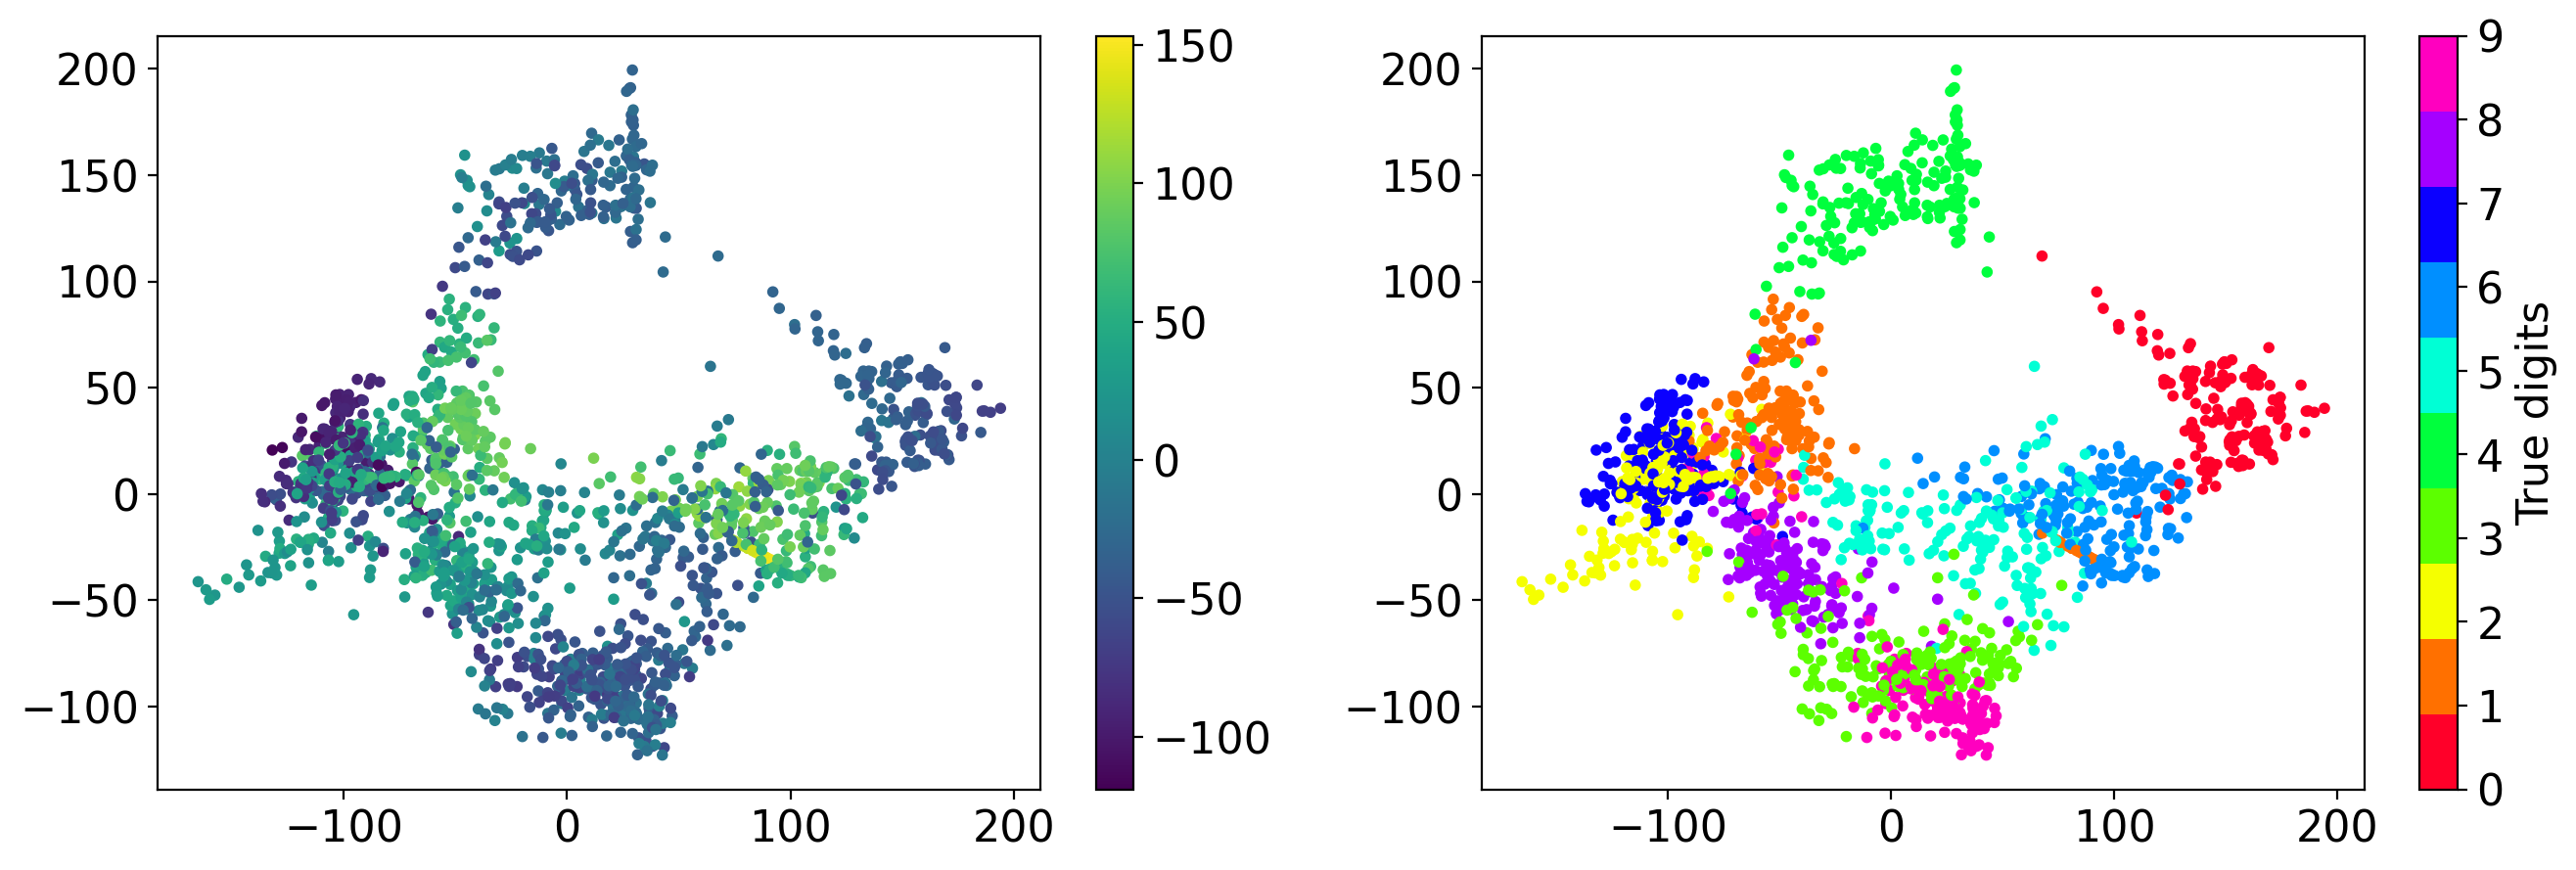

In [8]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 5))
sc1 = ax1.scatter(X_transformed[:, 0], X_transformed[:, 1], s=10, c=X_transformed[:,2], cmap='viridis')
fig.colorbar(sc1)

sc2 = ax2.scatter(X_transformed[:, 0], X_transformed[:, 1], s=10, c=digits.target, cmap=plt.cm.get_cmap('gist_rainbow', 10))
fig.colorbar(sc2, label='True digits', ticks=range(10))

fig.show()

/tmp/ipykernel_5020/697537803.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sctt = ax.scatter3D(X_transformed[:,0], X_transformed[:,1], X_transformed[:,2], c = digits.target,  cmap=plt.cm.get_cmap('gist_rainbow', 10))


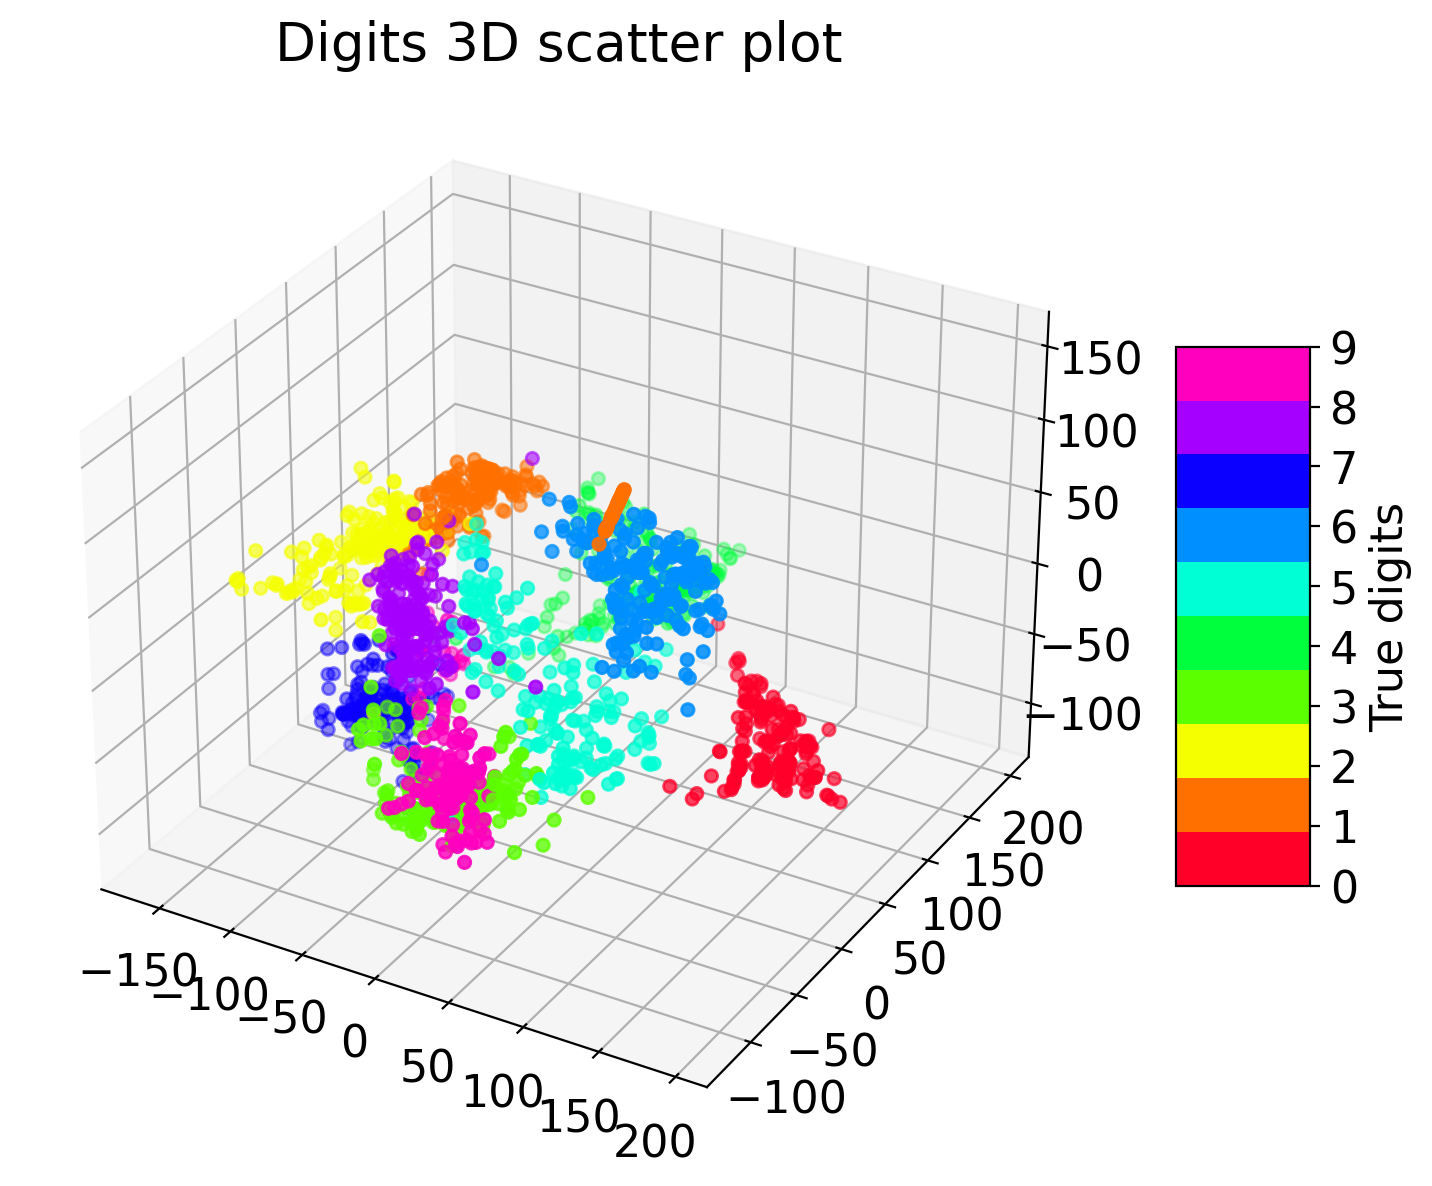

In [9]:
#%matplotlib notebook
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
sctt = ax.scatter3D(X_transformed[:,0], X_transformed[:,1], X_transformed[:,2], c = digits.target,  cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.title("Digits 3D scatter plot")
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 4, label="True digits", ticks=range(10))
 
# show plot
plt.show()

## Classification

Split data in train (80%) and test (20%)in order to classify the data in digits from 0 to 9 from the "blobbed" image above.\
After splitting I wanted to show how the digits seem like after being "reduced" to 3 components only $\longrightarrow$ human eye can't even recognise them!

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, digits.target, test_size=0.20, random_state=42)
print(X_train.shape, X_train.shape[0]/X_transformed.shape[0])

(1437, 3) 0.7996661101836394


In [11]:
X_train[0]

array([ 79.99897565,  10.74060094, 109.23379789])

Check to see data

In [12]:
X_train_img = np.zeros((2,2))
X_train_img[0,:2] = X_train[0,:2]
X_train_img[1,:2] = X_train[0,2:4]
X_train_img

array([[ 79.99897565,  10.74060094],
       [109.23379789, 109.23379789]])

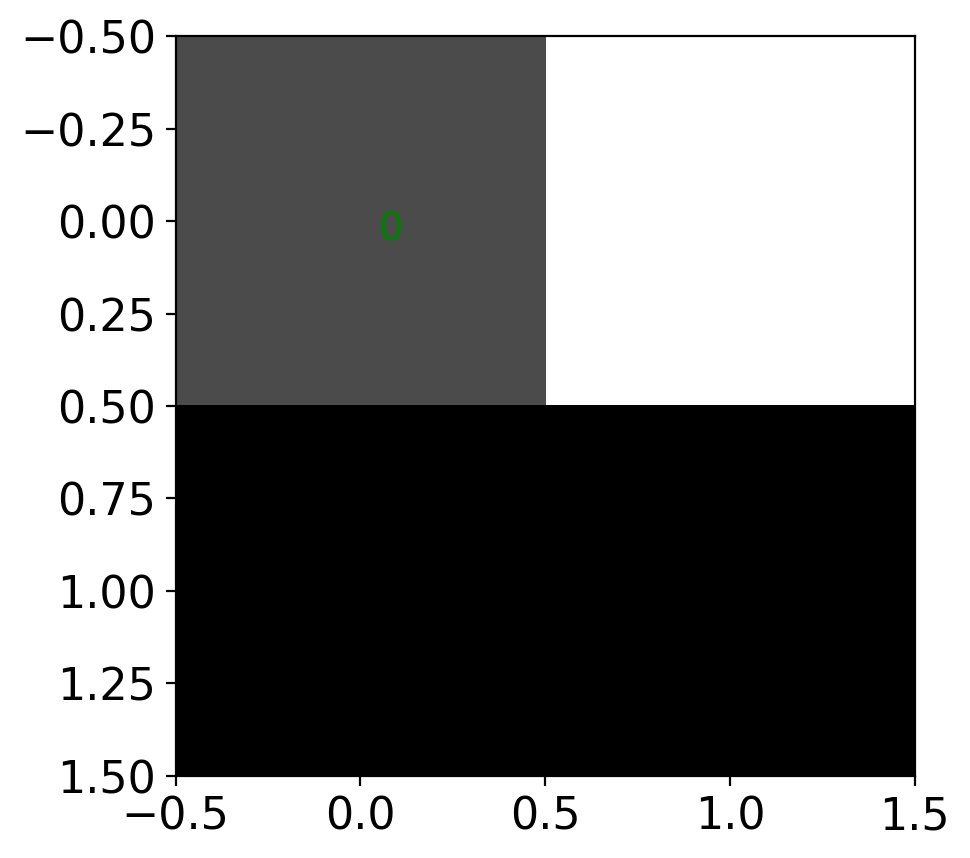

In [13]:
%matplotlib inline
plt.imshow(X_train_img, cmap='binary')
plt.text(0.05, 0.05, str(digits.target[0]), color='green', fontsize=14)
plt.show()

/tmp/ipykernel_5020/673821112.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


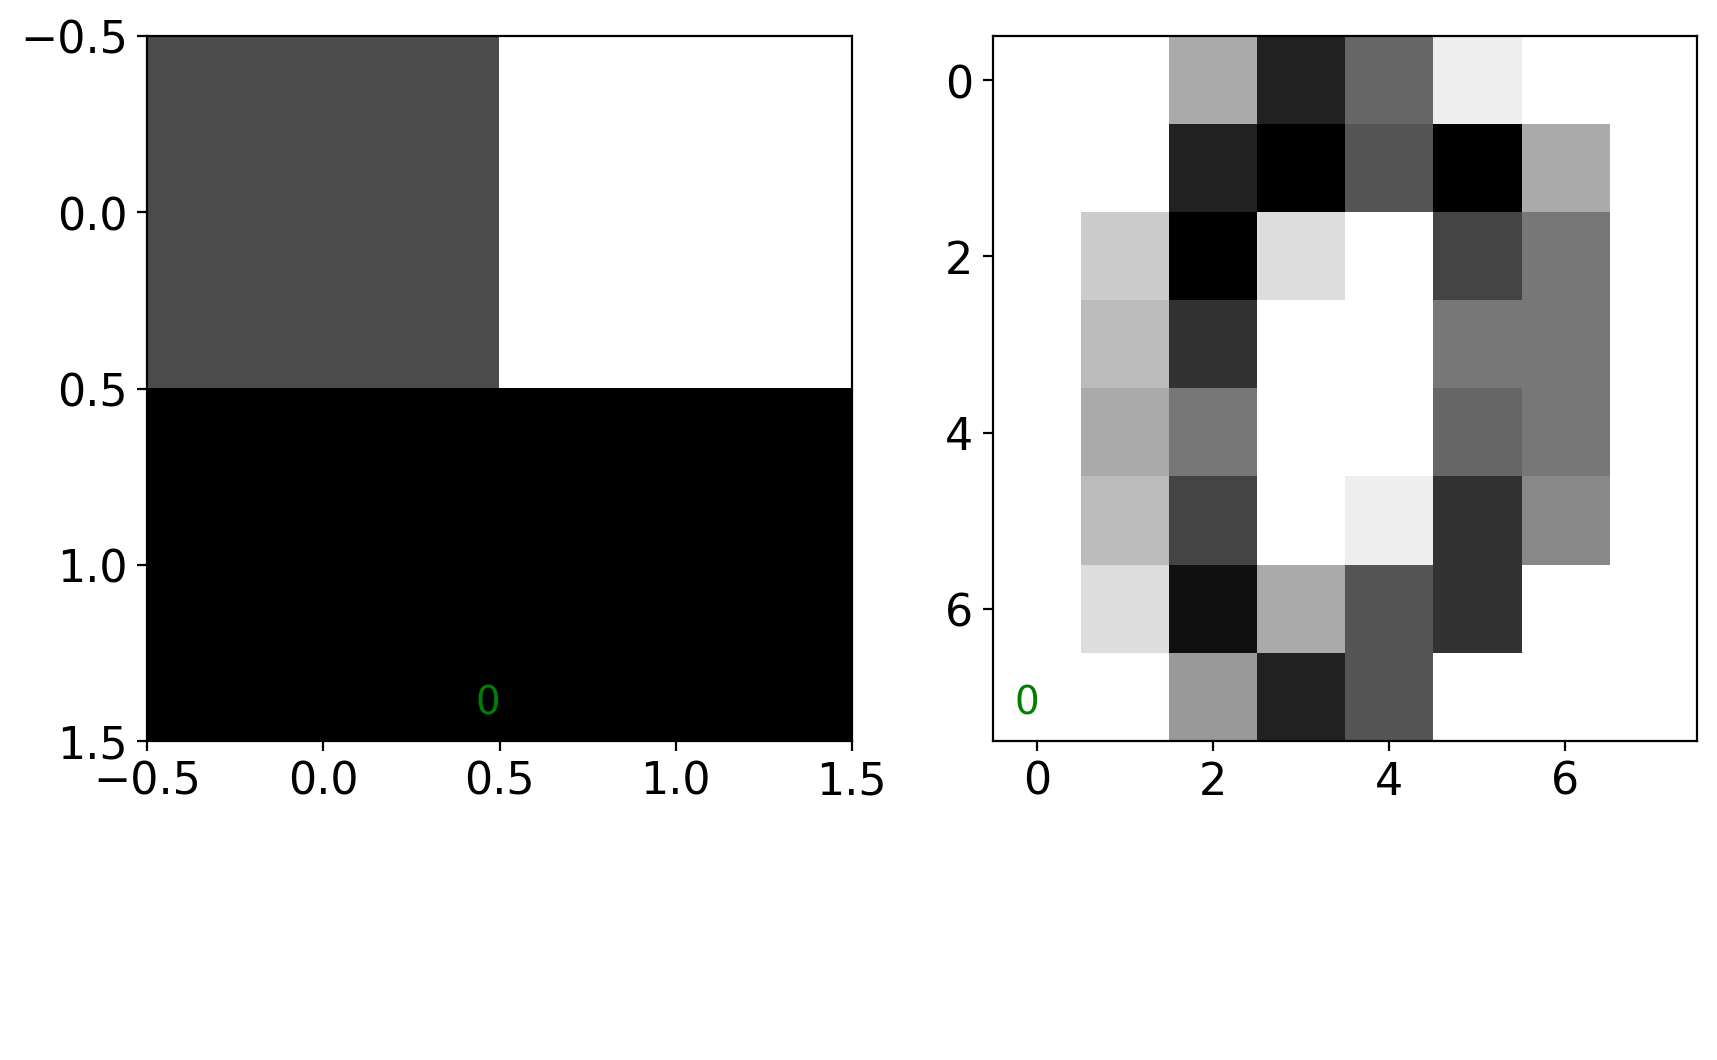

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10, 10))
ax1.imshow(X_train_img, cmap='binary')
ax1.text(0.5, 0.5, str(digits.target[0]),transform=ax.transAxes, color='green', fontsize=14)

ax2.imshow(digits.images[0], cmap='binary')
ax2.text(1.5, 0.5, str(digits.target[0]),transform=ax.transAxes, color='green', fontsize=14)

fig.show()

### Clustering: Unsupervised

Clustering with `KMeans`\
After clustering I plotted two 3D maps: 

&#10148; the first one shows the already reduced groups of digits with the true labels shown on the z axis and with the color

&#10148; the second one is showing the unsupervised - and unmatched - labels found by the algorithm, as levels on the z axis (digits 0 - 9 in the z axis are just growing numbers but are unmatched with real digits, I only used it to plot classified groups apart one from the other), whereas the color show the true targets

In [15]:
k_means = KMeans(n_clusters=10)
k_means.fit(X_train)
y_pred = k_means.predict(X_train)

/home/olga/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f63400a6940>
Traceback (most recent call last):
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f63400a6940>
Traceback (most recent call last):
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/olga/anaconda3/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_modul

/tmp/ipykernel_5020/1881970359.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sctt1 = ax.scatter3D(X_train[:, 0], X_train[:, 1], y_train, c = y_train, cmap=plt.cm.get_cmap('gist_rainbow', 10))


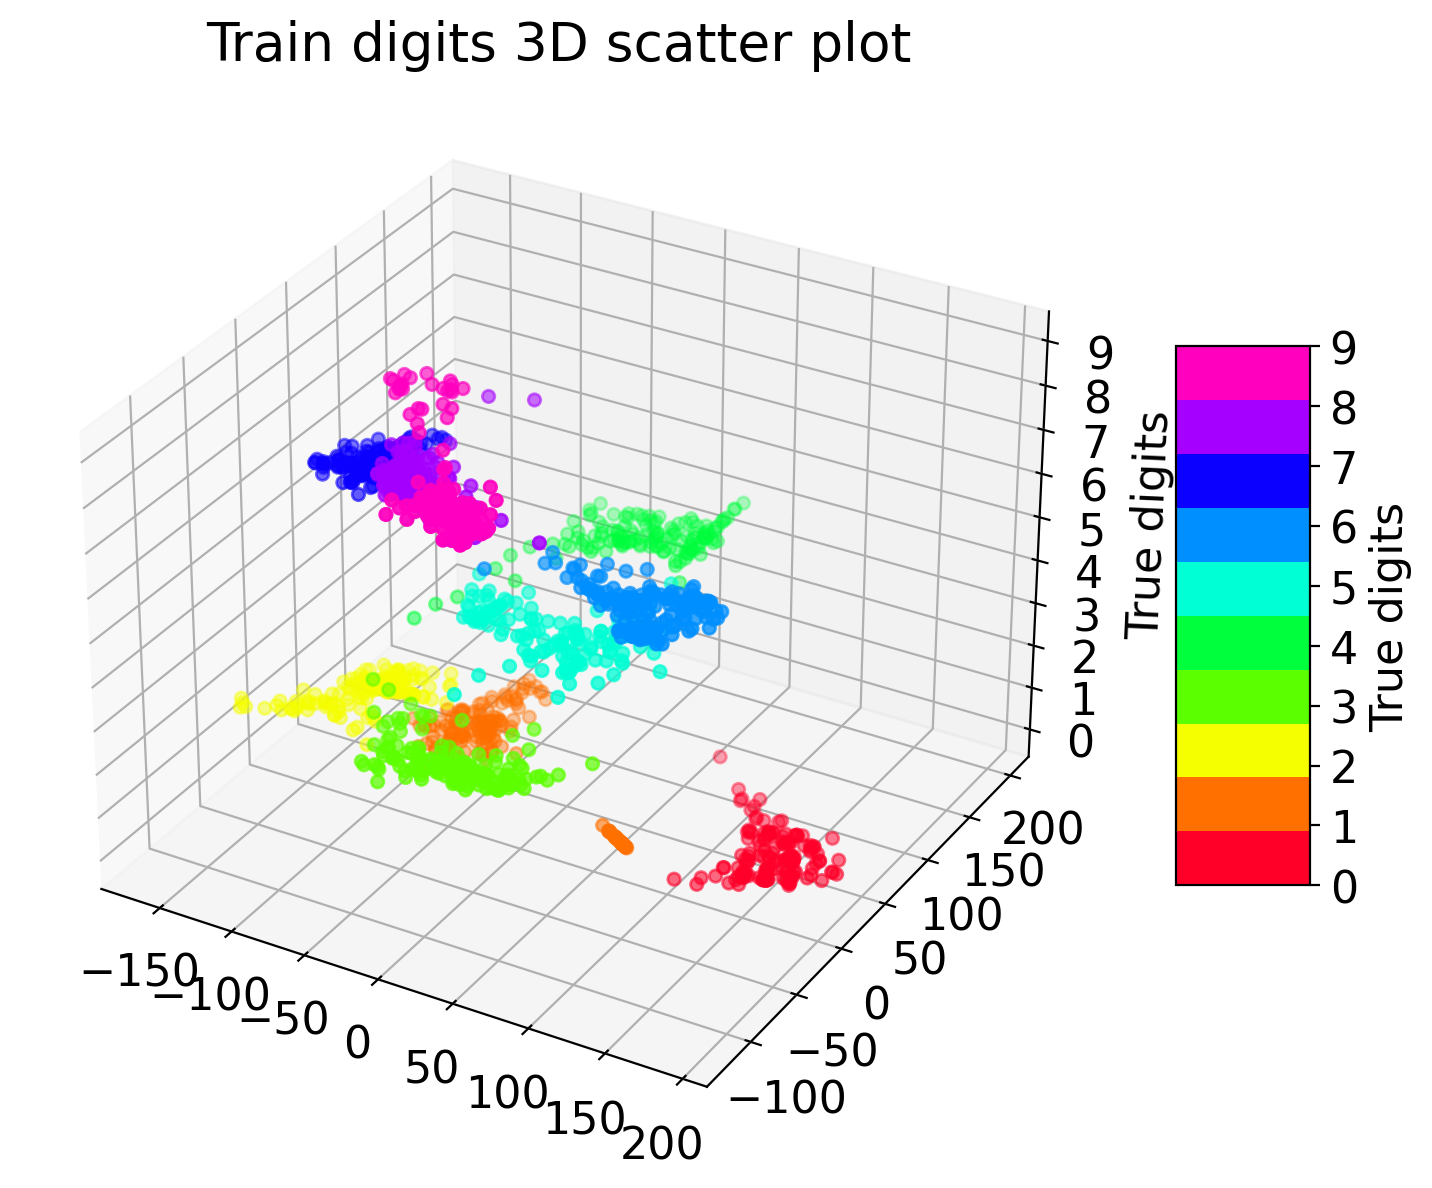

/tmp/ipykernel_5020/1881970359.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sctt2 = ax.scatter3D(X_train[:, 0], X_train[:, 1], y_pred, c = y_train, cmap=plt.cm.get_cmap('gist_rainbow', 10))


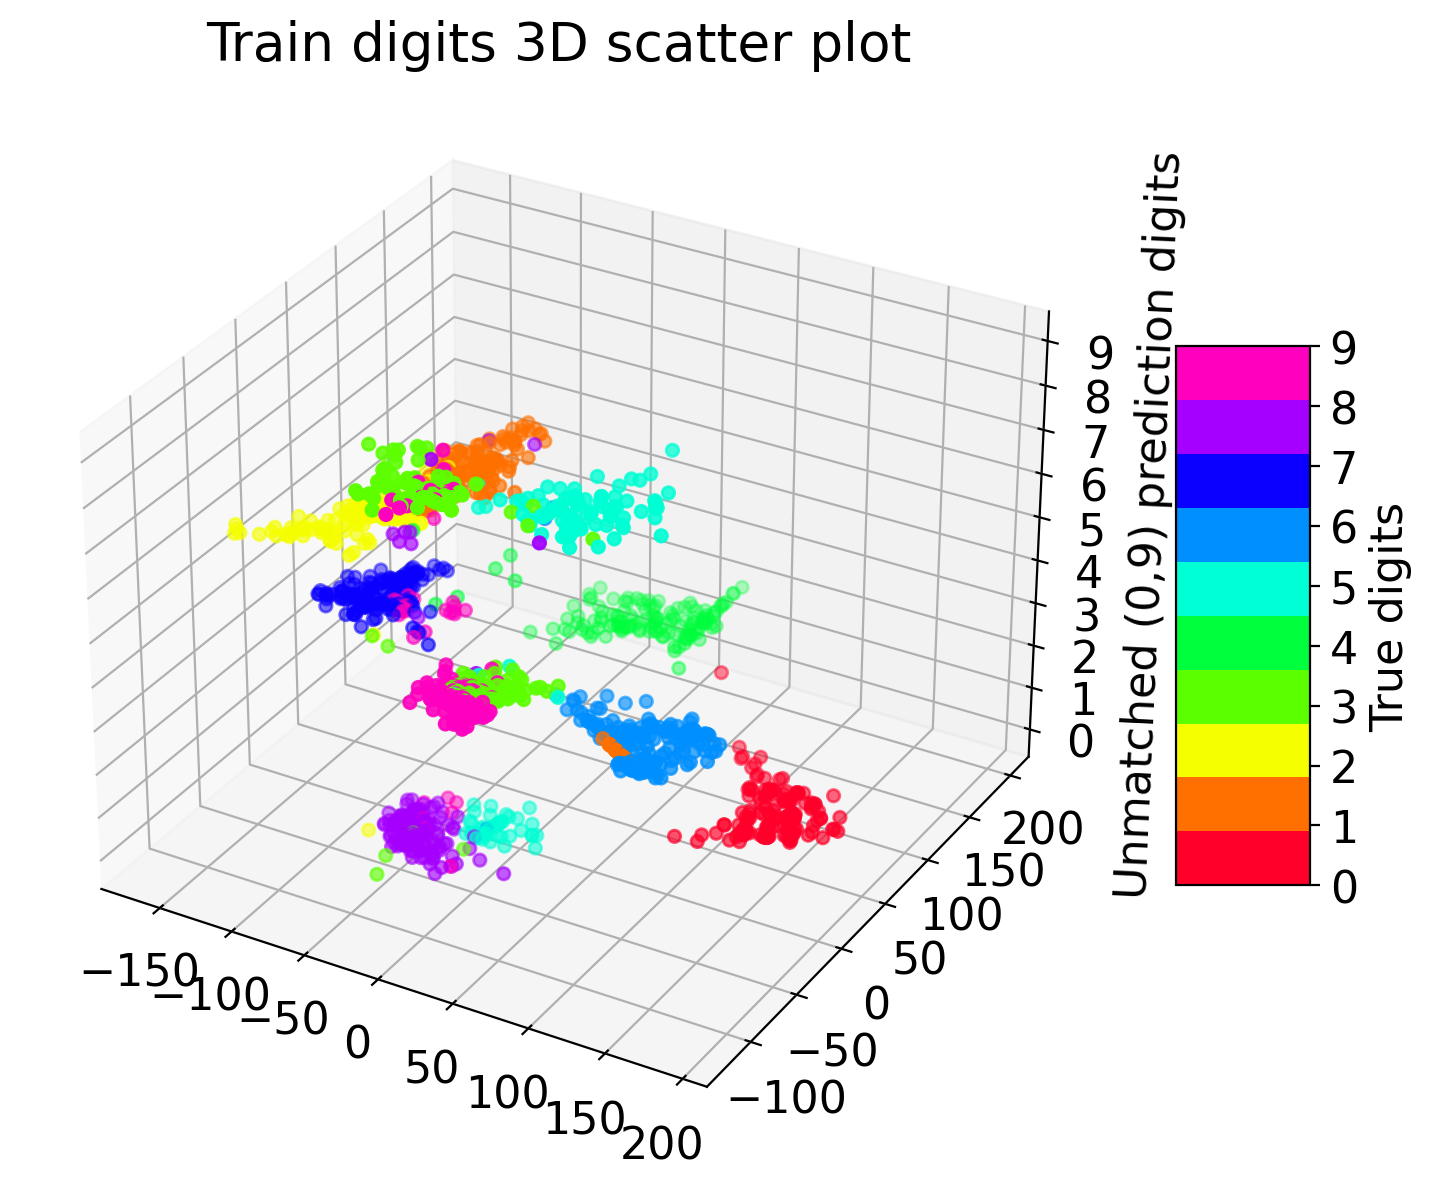

In [16]:
#%matplotlib notebook

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_zlabel("True digits")
ax.set_zticks(ticks=np.arange(0,10))

 
# Creating plot
sctt1 = ax.scatter3D(X_train[:, 0], X_train[:, 1], y_train, c = y_train, cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.title("Train digits 3D scatter plot")
fig.colorbar(sctt1, ax = ax, shrink = 0.5, aspect = 4, label="True digits", ticks=range(10))
 
# show plot
plt.show()

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_zlabel("Unmatched (0,9) prediction digits")
ax.set_zticks(ticks=np.arange(0,10))

 
# Creating plot
sctt2 = ax.scatter3D(X_train[:, 0], X_train[:, 1], y_pred, c = y_train, cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.title("Train digits 3D scatter plot")
fig.colorbar(sctt2, ax = ax, shrink = 0.5, aspect = 4, label="True digits",ticks=range(10))
 
# show plot
plt.show()

### Supervised

Classification with `LogisticRegression`: 

1) fit the training set $\rightarrow$ let the algorithm learn from the training

2) predict labels from the training

3) validate with the test set

4) compare with true targets

In [17]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/home/olga/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#make prediction for the train set and for the test set
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [19]:
print(y_train_pred[:50], "\n", y_train[:50])

[6 0 0 3 0 5 0 0 4 1 2 8 4 5 5 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 9 3 7 1 6 4 1
 2 1 1 6 4 7 4 8 3 4 0 5 1] 
 [6 0 0 3 0 5 0 0 4 1 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1
 2 1 1 6 4 7 4 8 3 4 0 5 1]


In [20]:
#see probabilities
clf.predict_proba(X_train)
clf.predict_proba(X_test)

array([[5.53070369e-04, 1.89403731e-03, 2.96910686e-13, ...,
        1.62278513e-16, 5.78756482e-09, 7.60335305e-13],
       [3.06108597e-08, 3.32277413e-11, 3.11148709e-07, ...,
        1.25144500e-03, 2.37548608e-03, 4.85835299e-01],
       [1.62747596e-07, 8.83854190e-12, 5.21827481e-08, ...,
        3.45010099e-03, 4.01745456e-04, 3.21240366e-01],
       ...,
       [6.64828850e-12, 1.43855726e-04, 1.98856253e-01, ...,
        4.68157190e-07, 7.99601076e-01, 1.27301782e-03],
       [3.36956348e-04, 1.33423459e-08, 1.31812889e-07, ...,
        2.04269212e-03, 2.02368880e-03, 2.30509258e-01],
       [1.44343383e-03, 6.27141544e-09, 2.65862416e-08, ...,
        3.05766720e-03, 3.35054599e-04, 9.08131281e-02]])

/tmp/ipykernel_5020/18201542.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sctt3 = ax.scatter3D(X_train[:, 0], X_train[:, 1], y_train_pred, c = y_train, cmap=plt.cm.get_cmap('gist_rainbow', 10))


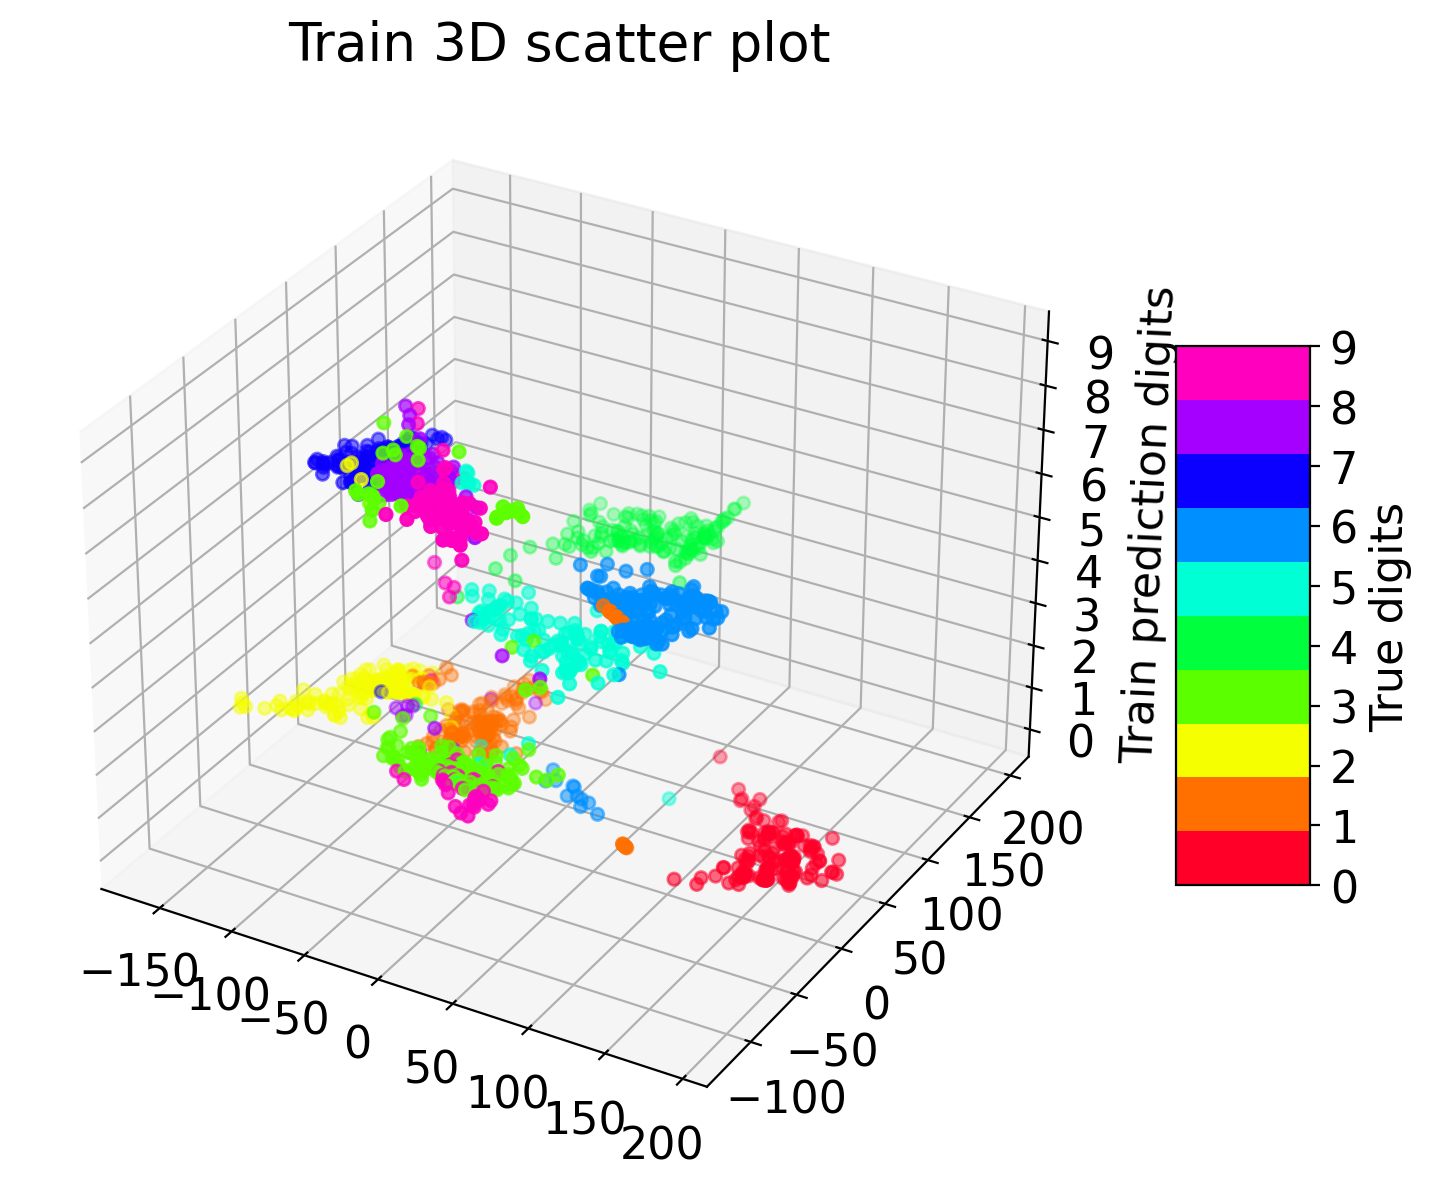

/tmp/ipykernel_5020/18201542.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sctt4 = ax.scatter3D(X_test[:, 0], X_test[:, 1], y_test_pred, c = y_test, cmap=plt.cm.get_cmap('gist_rainbow', 10) )


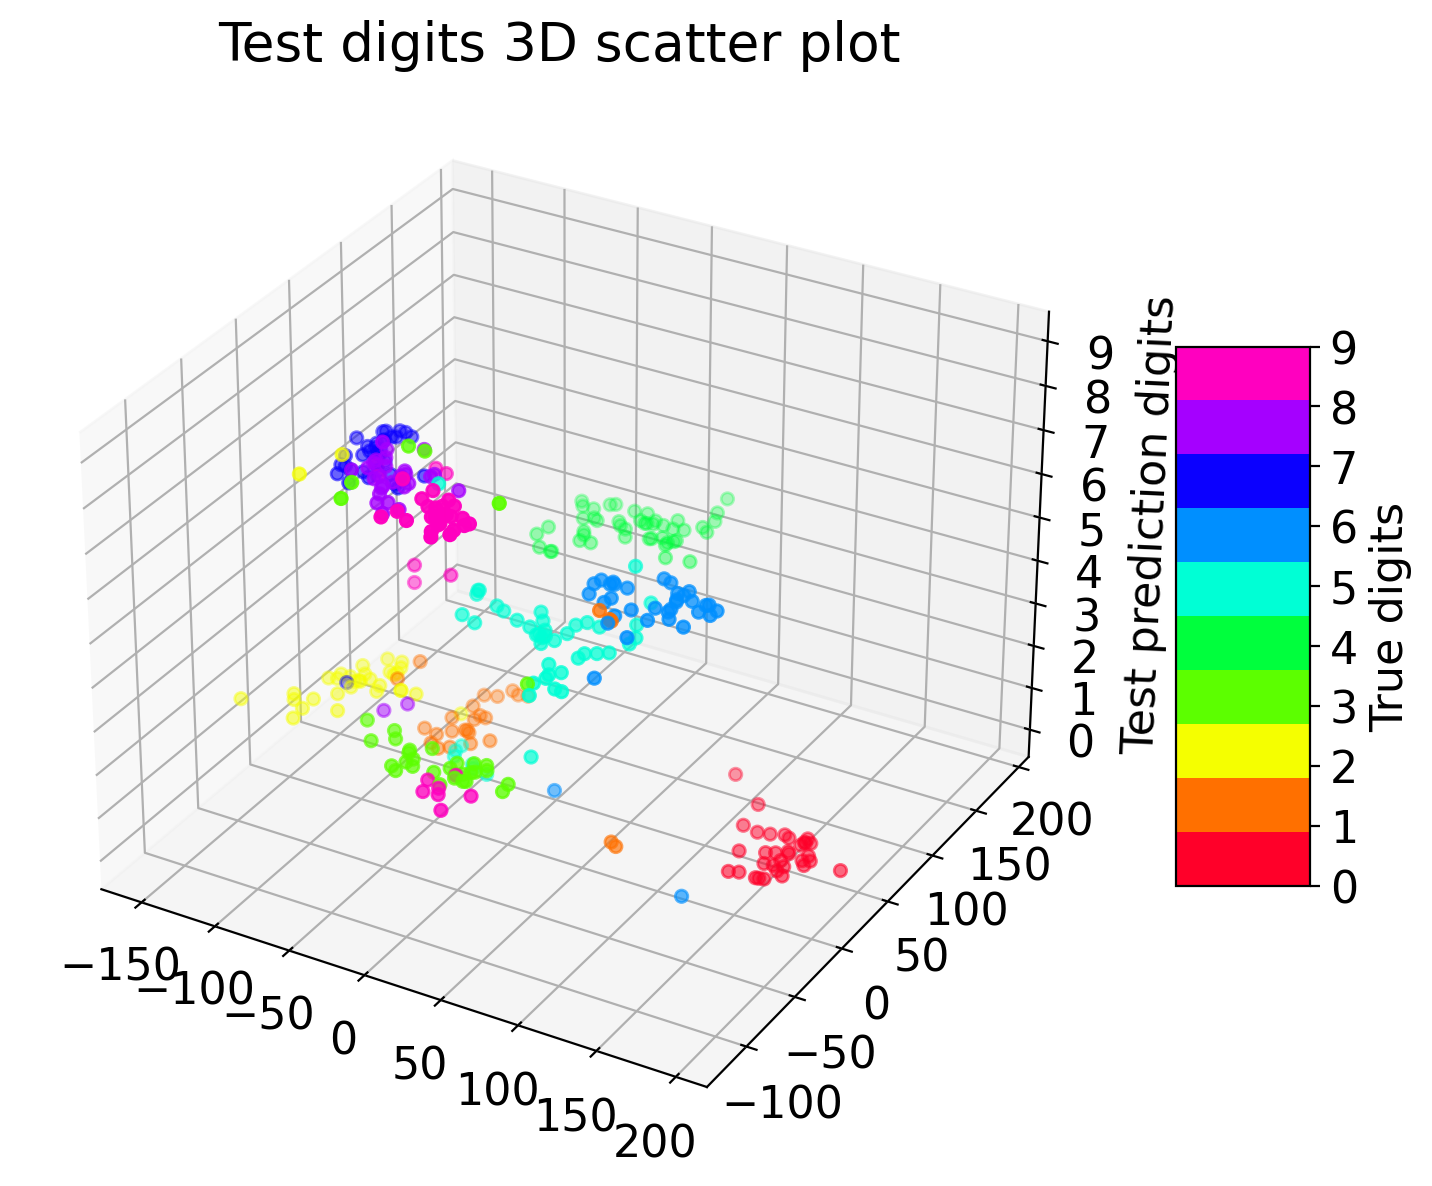

In [21]:
#%matplotlib notebook

# Creating plot

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_zlabel("Train prediction digits")
ax.set_zticks(ticks=np.arange(0,10))

sctt3 = ax.scatter3D(X_train[:, 0], X_train[:, 1], y_train_pred, c = y_train, cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.title("Train 3D scatter plot")
fig.colorbar(sctt3, ax = ax, shrink = 0.5, aspect = 4, label="True digits",ticks=range(10))



# show plot
plt.show()

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.set_zlabel("Test prediction digits")
ax.set_zticks(ticks=np.arange(0,10))

sctt4 = ax.scatter3D(X_test[:, 0], X_test[:, 1], y_test_pred, c = y_test, cmap=plt.cm.get_cmap('gist_rainbow', 10) )
plt.title("Test digits 3D scatter plot")
fig.colorbar(sctt4, ax = ax, shrink = 0.5, aspect = 4, label="True digits",ticks=range(10))
 
# show plot
plt.show()

## Algorithm score

Just by looking at the digits by eye I got 40/49 which is a score of 81.6%. The algorithm does not get so much better, but we started with 64-dim parameters space and then reduced it to only three so maybe to increase the score it may be better to keep some more dimensions.

-------

The confusion matrix shows that the least recognized digits are 3 and 9, 2 and 8, 5 and 9, 7 and 9, 2 and 1 which are very similar if hand-writted, but surprisingly also 5 and 1 and 6 and 1.

In [22]:
train_score = accuracy_score(y_train_pred, y_train)
test_score = accuracy_score(y_test_pred, y_test)
print("Train score: ", train_score, "\nTest score (significant one): ", test_score)

Train score:  0.8816979819067502 
Test score (significant one):  0.8777777777777778


In [23]:
print(np.arange(0,10),"\n",confusion_matrix(y_train_pred, y_train), "\n\n", confusion_matrix(y_test_pred, y_test))

[0 1 2 3 4 5 6 7 8 9] 
 [[145   0   0   0   0   1   0   0   0   0]
 [  0 130   3   0   0   3  12   0   4   0]
 [  0  10 137   0   1   0   0   1   5   1]
 [  0   0   0 115   0   4   0   0   1  31]
 [  0   0   0   0 133   0   0   0   0   0]
 [  0   0   0   5   0 121   1   0   3   4]
 [  0  14   0   0   0   0 133   0   0   0]
 [  0   0   1   1   1   0   0 144   1  19]
 [  0   0   3   2   0   6   0   0 126   2]
 [  0   0   0  26   0   0   0   0   4  83]] 

 [[33  0  0  0  0  0  1  0  0  0]
 [ 0 23  1  0  0  6  1  0  0  0]
 [ 0  2 30  0  0  0  0  1  2  0]
 [ 0  0  0 28  0  1  0  0  0  7]
 [ 0  0  0  0 46  0  0  0  0  1]
 [ 0  0  0  1  0 38  1  0  0  2]
 [ 0  3  0  0  0  1 32  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  4]
 [ 0  0  2  0  0  1  0  0 27  0]
 [ 0  0  0  5  0  0  0  0  1 26]]


/tmp/ipykernel_5020/2664628532.py:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(confusion_matrix(y_test_pred, y_test)), cmap='Blues', interpolation='nearest')


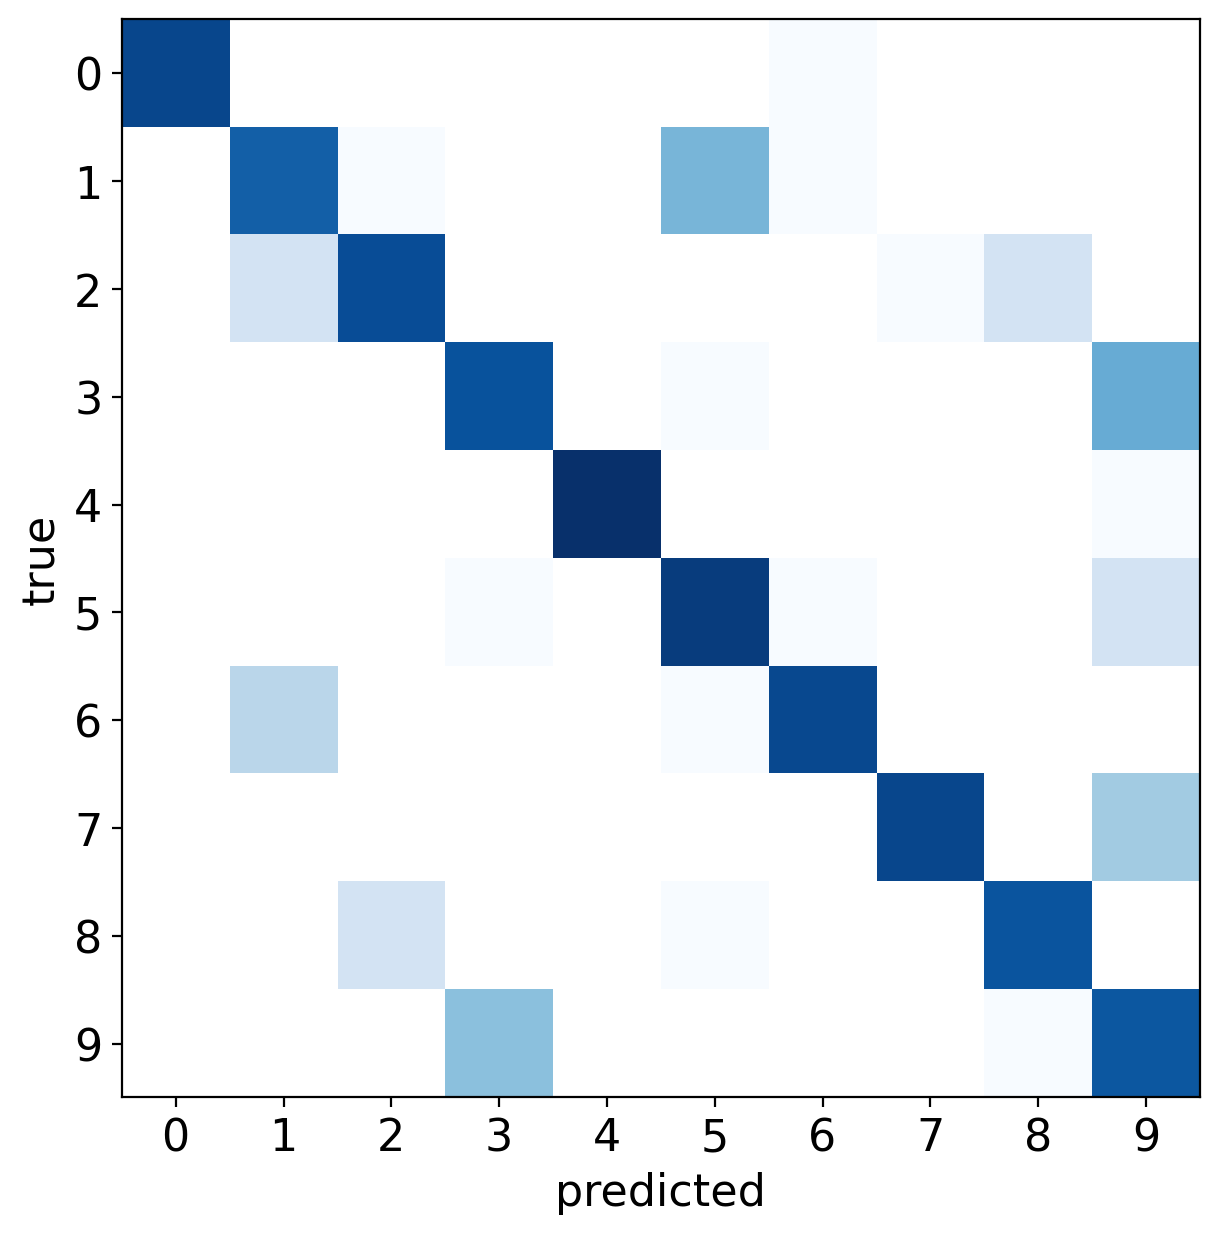

In [24]:
fig = plt.figure(figsize = (10, 7))
plt.imshow(np.log(confusion_matrix(y_test_pred, y_test)), cmap='Blues', interpolation='nearest')
plt.xticks(ticks=np.arange(0,10))
plt.yticks(ticks=np.arange(0,10))
plt.ylabel('true')
plt.xlabel('predicted');

## Check score in function of n dimension

But why do I have to reduce a 64-dim space to a 3-dim space? Maybe if I increase the number of components given to the classification algorithm it can identify them better!

$\Longrightarrow$ Increasing the number of components leads to the increase of the score $\rightarrow$ I can keep up to 5/6 number of features and I get a score of 98%, but then how many components I have in my dataset becomes irrelevant in order to classify digits better

In [25]:
n = digits.data.shape[1]
min_n = 2

In [26]:
os.path.exists("./class_scores.npz")

True

In [27]:
if not os.path.exists("./class_scores.npz"):
    print("no")
    scores=[]
    for i in tqdm(np.arange(min_n,n+1)):
        #dimensionality reduction
        X_i = digits.data
        embedding = Isomap(n_components=i)
        X_transformed_i = embedding.fit_transform(X_i)

        #supervised classification
        X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_transformed_i, digits.target, test_size=0.20, random_state=42)
        clf_i = LogisticRegression(random_state=0).fit(X_train_i, y_train_i)
        y_test_pred_i = clf_i.predict(X_test_i)
        scores.append(accuracy_score(y_test_pred_i, y_test_i))
        #print(i)
        np.savez_compressed("./class_scores.npz",scores)
else:
        scores=np.load("./class_scores.npz")['arr_0']

In [28]:
mean_score = scores[3:].mean()
mean_score

0.9839814814814817

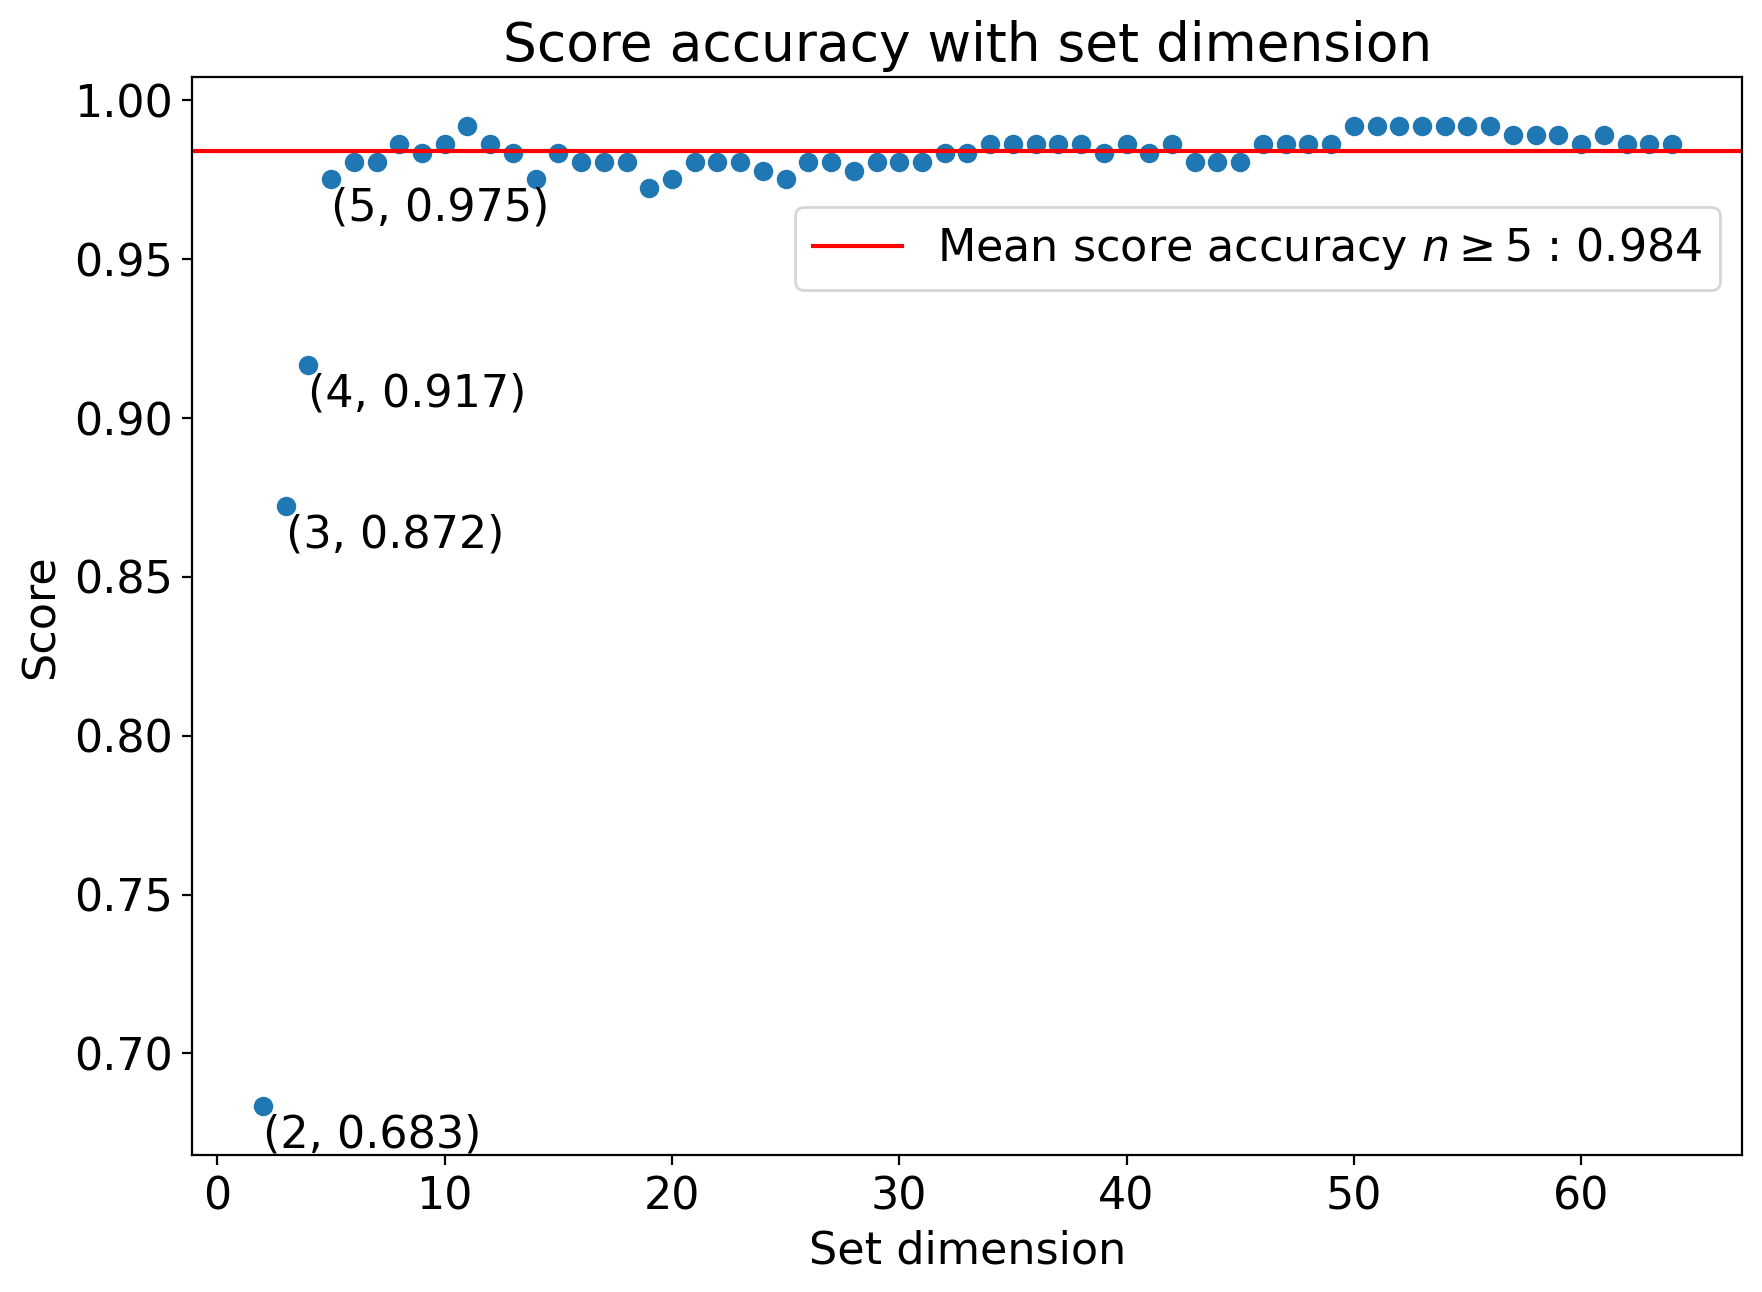

In [29]:
%matplotlib inline

plt.figure(figsize = (10, 7))
plt.scatter(np.arange(min_n,n+1), np.array(scores))
for i, j in zip(np.arange(min_n,n+1)[:4], np.array(scores)[:4]):
   plt.text(i, j-0.013, '({}, {})'.format(i, round(j,3)))
plt.axhline(y=mean_score, color='r', linestyle='-', label="Mean score accuracy $n \geq 5$ : "f'{round(mean_score,3)}')

plt.legend(bbox_to_anchor=(1,0.9))
plt.xlabel("Set dimension")
plt.ylabel("Score")
plt.title("Score accuracy with set dimension")
plt.show()